Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  T

C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

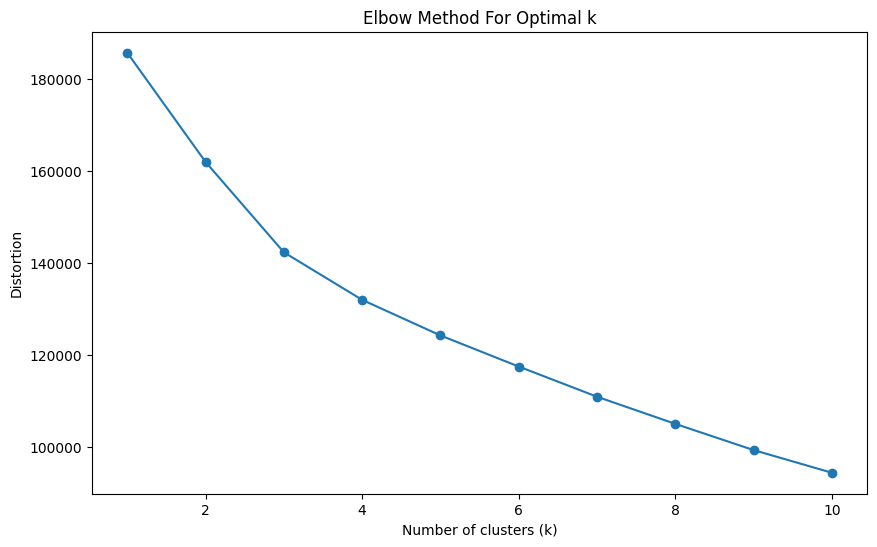

C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

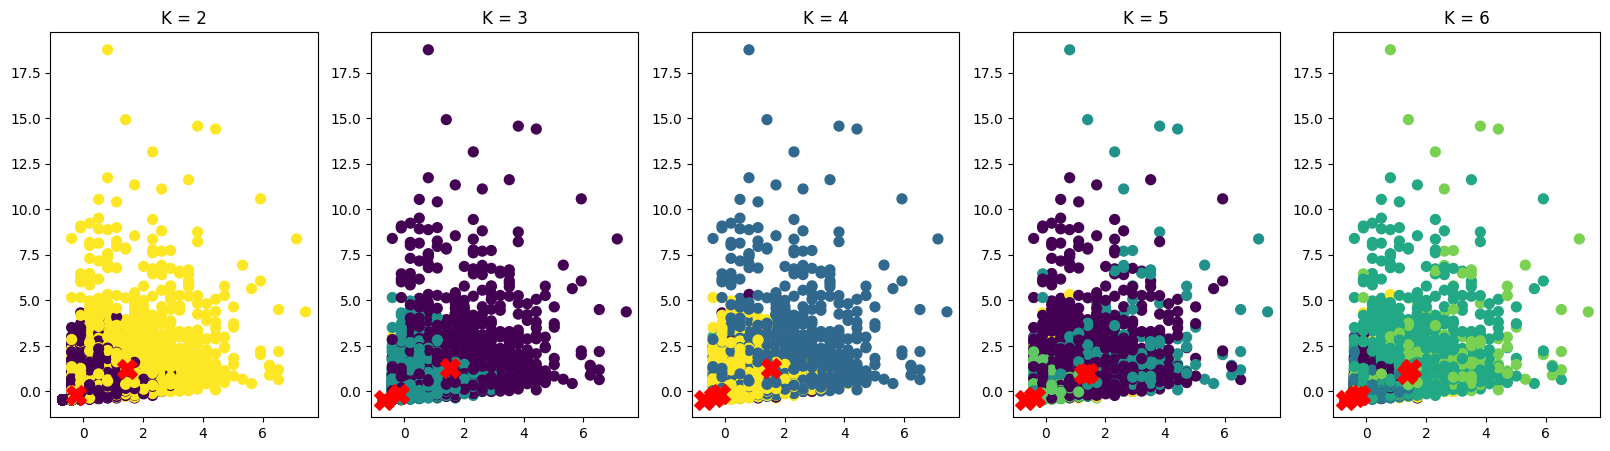

C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


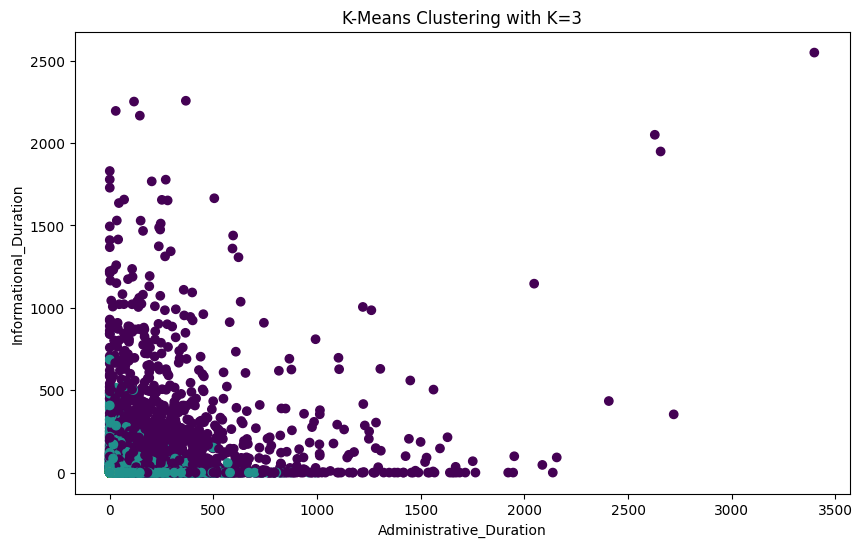

C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kavas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

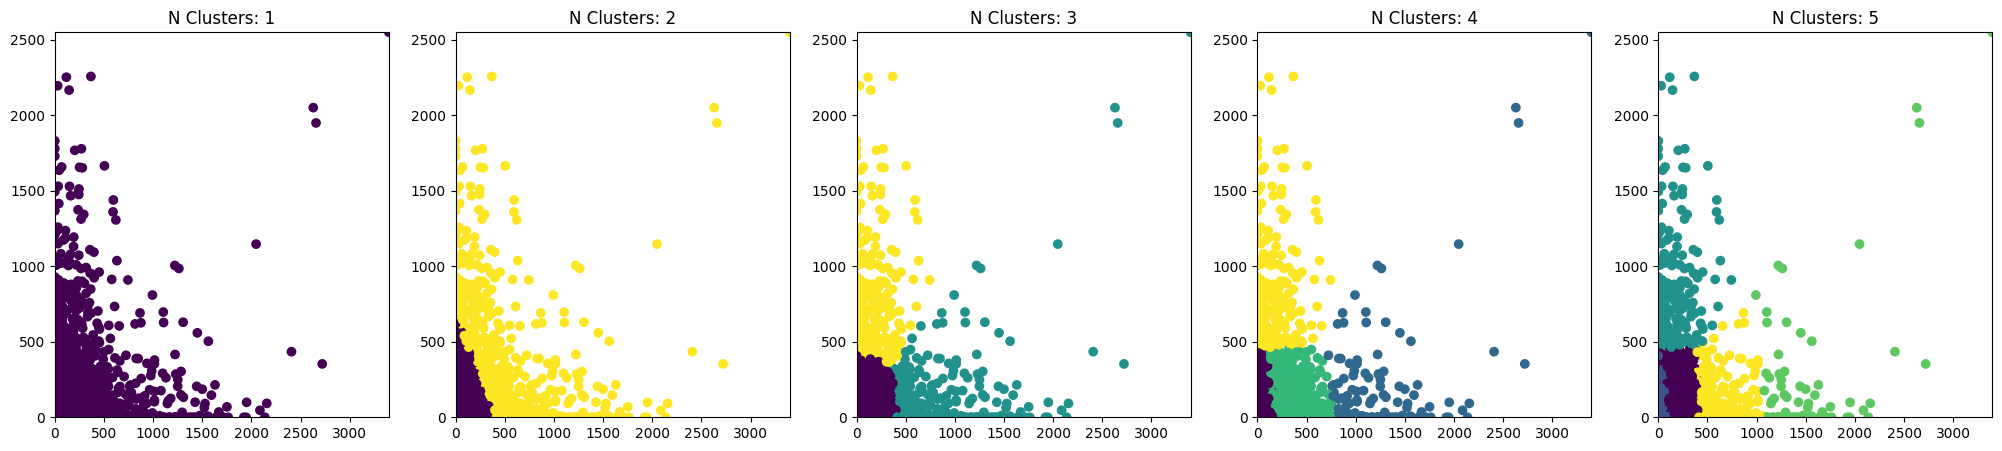

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Display basic information about the dataset
print("Dataset information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Handling missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Encoding categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')

# Identifying numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', cat_imputer),
    ('encoder', encoder)
])

# Combined preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Function to plot the Elbow method
def plot_elbow_method(data, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

# Function to perform K-Means clustering and visualize clusters
def k_means_clustering(data, k_values):
    fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))
    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        axs[i].scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
        axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
        axs[i].set_title(f'K = {k}')
    plt.show()

# Plotting the Elbow method to find the optimal number of clusters
k_range = range(1, 11)
plot_elbow_method(processed_data, k_range)

# Identifying clusters for 5 different K-values
k_values = [2, 3, 4, 5, 6]
k_means_clustering(processed_data, k_values)

# K-Means clustering with a specific K value (example with K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(processed_data)
df['kmeans_clnum'] = clusters

# Plotting the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['Administrative_Duration'], df['Informational_Duration'], c=df['kmeans_clnum'], cmap='viridis')
plt.xlabel('Administrative_Duration')
plt.ylabel('Informational_Duration')
plt.title('K-Means Clustering with K=3')
plt.show()

# Visualizing clusters for different K values (1 to 5)
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'KMeans_{k}'] = kmeans.fit_predict(df[['Administrative_Duration', 'Informational_Duration']])
    axs[k-1].scatter(df['Administrative_Duration'], df['Informational_Duration'], c=df[f'KMeans_{k}'], cmap='viridis')
    axs[k-1].set_ylim(df['Informational_Duration'].min(), df['Informational_Duration'].max())
    axs[k-1].set_xlim(df['Administrative_Duration'].min(), df['Administrative_Duration'].max())
    axs[k-1].set_title(f'N Clusters: {k}')
plt.show()
